# Importing Libraries

In [6]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk

import tensorflow as tf
from tensorflow import keras
import keras_core as nlp
import keras_nlp
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

# Preprocessing Data

In [8]:
BATCH_SIZE = 32
EPOCHS = 2
NUM_TRAINING_EXAMPLES = train.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
STEPS_PER_EPOCH =NUM_TRAINING_EXAMPLES*TRAIN_SPLIT // BATCH_SIZE
AUTO = tf.data.experimental.AUTOTUNE


In [9]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [10]:
from sklearn.model_selection import train_test_split

X = train['text']
y = train['target']

x_train , x_valid , y_train , y_valid = train_test_split(X , y , test_size =VAL_SPLIT , random_state = 42)
X_test = test['text']

# Loading The Model

In [11]:
preset = 'distil_bert_base_en_uncased'
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset, sequence_length=128)

In [12]:
processor = keras_nlp.models.DistilBertClassifier.from_preset(preset , preprocessor ,num_classes = 2 )

In [13]:
classifier = processor.summary()

Preprocessor: "distil_bert_text_classifier_preprocessor_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
processor.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
history = processor.fit(x=x_train , y=y_train ,batch_size = 16 , epochs = EPOCHS, validation_data=(x_valid , y_valid))

Epoch 1/2
381/381 ━━━━━━━━━━━━━━━━━━━━ 388s 915ms/step - accuracy: 0.4287 - loss: 0.7651 - val_accuracy: 0.4261 - val_loss: 0.6931
Epoch 2/2
381/381 ━━━━━━━━━━━━━━━━━━━━ 323s 847ms/step - accuracy: 0.4276 - loss: 0.6931 - val_accuracy: 0.4261 - val_loss: 0.6931


In [15]:
y_pred_train = processor.predict(x_train)
y_pred_valid = processor.predict(x_valid)

191/191 ━━━━━━━━━━━━━━━━━━━━ 117s 576ms/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 32s 663ms/step


In [21]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Not Disaster","Disaster"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

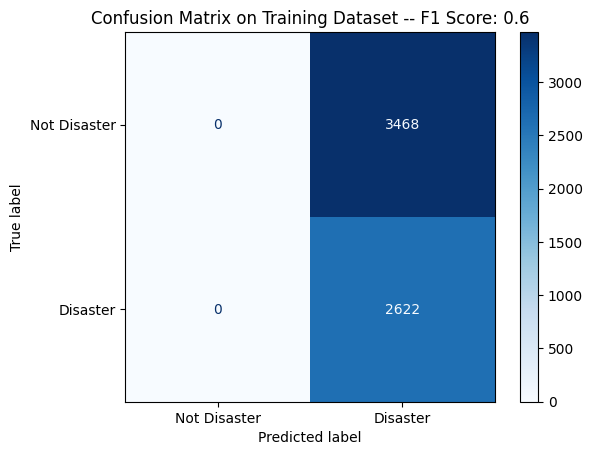

In [24]:
displayConfusionMatrix(y_train, y_pred_train, "Training")

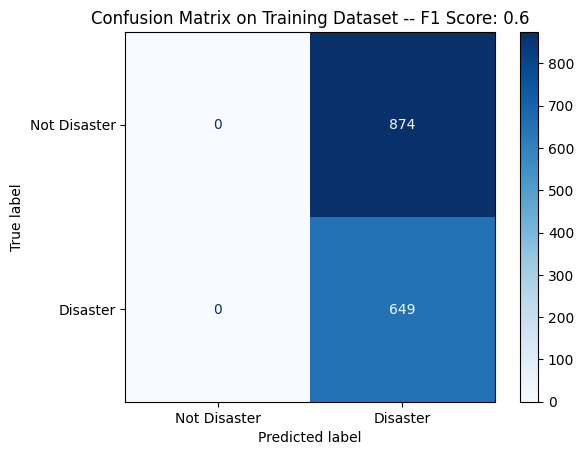

In [25]:
displayConfusionMatrix(y_valid, y_pred_valid, "Training")

# Submit File 

In [36]:
submission =  pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [37]:
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
x_test = test['text']

In [38]:
submission['target'] = np.argmax(processor.predict(x_test) , axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 65s 639ms/step


In [43]:
submission.to_csv('submission' , index = False)